In [5]:
# подготовимся к импорту API который находится в родительской папке относительно этой тетрадки
import sys
import os
path = os.getcwd()
print(path)
sys.path.insert(0, path)
# импортируем api
import unifloc_vba_python_api.python_api as python_api 
# готовим объект с доступом к надстройке. При этом надстройка откроется и запустится excel 
UniflocVBA = python_api.API("UniflocVBA_7.xlam")
print("import excel with unifloc vba done. version " + UniflocVBA.unf_version())

C:\Users\Sevrn\Desktop\C#\unifloc_net\test
import excel with unifloc vba done. version 7.25


In [1]:
import sys
import clr
import DLLs
from ctypes import *
import os
path = os.path.abspath('..')
cur_path = path + '\\u7_excel\\bin\\Debug'

sys.path.append(f'{cur_path}')
clr.AddReference('alglibnet2')
clr.AddReference('UnfClassLibrary')
clr.AddReference('u7_excel')

import UnfClassLibrary
import u7_excel

In [7]:
import numpy as np
import matplotlib as mpl
from matplotlib import pylab as plt

In [8]:
p_0 = 10
p_n = 460
dp = 20 
p_atm = np.arange(p_0, p_n, dp) #
t_C = 80 #
gamma_gas_ = 0.8 # удельная плотность газа, по воздуху;
gamma_oil_ = 0.86 # удельная плотность нефти, по воде;
gamma_wat_ = 1.1 # удельная плотность воды, по воде;
Rsb_ = 80 # газосодержание при давлении насыщения, м3/м3;
Rp_  = 80 # замерной газовый фактор, м3/м3;
Pb_ = 125 # давление насыщения при температуре пласта, атм;
Tres_ = 100 # пластовая температура, С;
Bob_ = 1.2 # объемный коэффициент нефти, м3/м3;
muob_ = 1 # вязкость нефти при давлении насыщения, сП;
PVTcorr = 0; # Выбор набора корреляций для расчета;
# Зададим параметры сепарации для учета влияния на свойства флюида
Ksep_ = 0.5 # коэффициент сепарации дополнительынй для сепарации заданной в потоке;
Psep_ = 50 # давление при которой была сепарация, атм;
Tsep = 80 # температура при которой была сепарция, С;
gas_only = False
# Параметры потока флюида
fw_ = 15 # объемная обводненность, %;
T_choke = 80 # температура, С;
# Конструкция 
d_pipe = 70 # диаметр трубы до и после штуцера, мм;
d_choke = 25 # диаметр штуцера (эффективный), мм;
Qliq_ = 80 # дебит жидкости в ст. условиях, м3/сут;
Pbuf_ = 60 # давление на входе, атм;
Plin_ = 50 # давление на выходе, атм;
qgas_free = 0 # свободный газ. дополнительный к pvt потоку, м3/сут;
#Зададим направление расчета относительно потока:
Calc_along_flow1 = 1 # расчет по потоку (давление на выкиде по известному давлению на входе);
Calc_along_flow0 = 0 # расчет против потока (давление на входе по известному давлению на выкиде);
# Создадим массивы давлений и дебита жидкости для расчета против потока:
pline_0 = 1
pline_n = 32
dp = 5 
pline_atm = np.arange(pline_0, pline_n, dp) # массив давлений на выходе;
Q_0 = 0
Q_n = 230
dQ = 10 
Q_sm3day = np.arange(Q_0, Q_n, dQ) # дебит жидкости;
p_choke_list0 = []
p_choke_list0_choke = []
q_choke_list_dll, q_choke_list = [], []
d_choke_list = []
d_choke_ = 5
pvt_str = u7_excel.u7_Excel_function_servise.PVT_encode_string(0.8, 0.86, 1.1, 80, 80, 125, 100, 1.2, 1,PVTcorr,Ksep_,Psep_,Tsep, gas_only)
str_ = UniflocVBA.PVT_encode_string(0.8, 0.86, 1.1, 80, 80, 125, 100, 1.2, 1,PVTcorr,Ksep_,Psep_,Tsep, gas_only)

for q in Q_sm3day:
    d_choke_ += 2
    fw_ += 5
    d_choke_list.append(d_choke_)
    p_choke_0 = UniflocVBA.MF_p_choke_atma(q, fw_, d_choke, pline_n, Calc_along_flow0, d_pipe, T_choke, 1, pvt_str)
    p_choke_list0.append(p_choke_0[0][0])
    p_choke_1 = u7_excel.u7_Excel_functions_MF.MF_p_choke_atma(q, fw_, d_choke, pline_n, Calc_along_flow0, d_pipe, T_choke, 1, str_)
    p_choke_list0_choke.append(p_choke_1[0])
    q_choke0 = UniflocVBA.MF_q_choke_sm3day(fw_, d_choke_, Pbuf_, Plin_, d_pipe, T_choke, 1, pvt_str)
    q_choke_list.append(q_choke0[0][0])
    q_choke1 = u7_excel.u7_Excel_functions_MF.MF_q_choke_sm3day(fw_, d_choke_, Pbuf_, Plin_, d_pipe, T_choke, 1, str_)
    q_choke_list_dll.append(q_choke1[0])
        

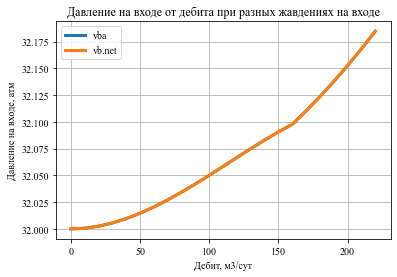

In [9]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman'
ys = [ p_choke_list0,  p_choke_list0_choke]

for j in range(2):
        plt.grid(True)
        plt.title('Давление на входе от дебита при разных жавдениях на входе', color='black', family='fantasy')
        plt.ylabel('Давление на входе, атм', color='black', family='fantasy')
        plt.xlabel('Дебит, м3/сут', color='black', family='fantasy')
        plt.plot(Q_sm3day, ys[j], linewidth=3)
plt.legend(('vba', 'vb.net')) 
plt.show()

In [10]:
print(q_choke_list_dll)
print(q_choke_list)

[106.4239080896326, 177.19766698161555, 266.9351250084967, 376.4450202604097, 506.73073977281933, 659.0296369742205, 834.8640448337368, 1036.107518196322, 1265.0714751019586, 1524.6198778050814, 1818.3234440324643, 2150.6710639012126, 2527.366368272523, 2955.7550912218753, 3445.460671729781, 4009.3655222521975, 4665.195084454158, 5352.569177118314, 6141.353995915042, 7054.886004678719, 8124.743472269447, 9394.661598760105, 10926.920112124457]
[106.42390808963259, 177.19766698161553, 266.9351250084967, 376.44502026040965, 506.730739772819, 659.0296369742204, 834.8640448337366, 1036.1075181963217, 1265.0714751019586, 1524.6198778049963, 1818.3234440324643, 2150.6710639012126, 2527.366368272523, 2955.755091221876, 3445.46067172978, 4009.3655222521966, 4665.195084454159, 5352.569177118315, 6141.353995915043, 7054.886004678719, 8124.743472269447, 9394.661598760107, 10926.920112124455]


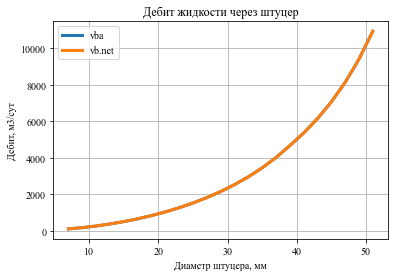

In [11]:
ys = [ q_choke_list,  q_choke_list_dll]

for j in range(2):
        plt.grid(True)
        plt.title('Дебит жидкости через штуцер', color='black', family='fantasy')
        plt.ylabel('Дебит, м3/сут', color='black', family='fantasy')
        plt.xlabel('Диаметр штуцера, мм', color='black', family='fantasy')
        plt.plot(d_choke_list, ys[j], linewidth=3)
plt.legend(('vba', 'vb.net')) 
plt.show()

In [30]:
q_0 = 35
q_n = 45
dq = 2
q_arr = np.arange(q_0, q_n, dq) #
choke_list, choke_dll_list = [], []
for q in q_arr:
    choke = UniflocVBA.MF_calibr_choke(qliq_sm3day=q, fw_perc=12, d_choke_mm=4, p_in_atma=80, p_out_atma=50, str_PVT = pvt_str)
    choke_list.append(choke[0][0])
    test_choke = u7_excel.u7_Excel_functions_MF.MF_calibr_choke(qliq_sm3day=q, fw_perc=12, d_choke_mm=4, p_in_atma=80, p_out_atma=50, str_PVT = str_)
    choke_dll_list.append(test_choke[0])

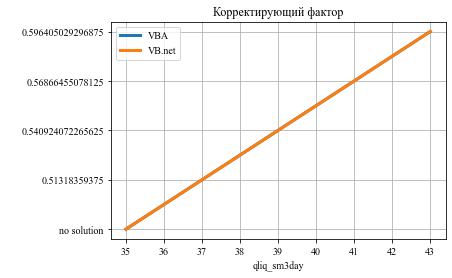

In [31]:
ys = [choke_list, choke_dll_list]
for i in range(2):
    plt.grid(True)
    plt.title('Корректирующий фактор', color='black', family='fantasy')
    plt.ylabel(' ', color='black', family='fantasy')
    plt.xlabel('qliq_sm3day', color='black', family='fantasy')
    plt.plot(q_arr, ys[i], linewidth=3)
plt.legend(('VBA','VB.net')) 
plt.show()

In [32]:
print(choke_dll_list)
print(choke_list)

['no solution', 0.51318359375, 0.540924072265625, 0.56866455078125, 0.596405029296875]
['no solution', 0.51318359375, 0.540924072265625, 0.56866455078125, 0.596405029296875]
